In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
import seaborn as sns
import matplotlib.font_manager as fm
%matplotlib inline

In [247]:
from matplotlib import font_manager

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()

'Arial Unicode MS'

In [248]:
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [249]:
df_2019_url = './data_2019_seoultraffic.csv'
df_2020_url = './data_2020_seoultraffic.csv'
traffic_2019 = pd.read_csv(df_2019_url) #2019 지역별
traffic_2020 = pd.read_csv(df_2020_url) #2020 지역별

In [250]:
traffic_2019.tail(2)[['year','month','day','요일','구','총합','0','1','2','3','4','5','6','7','8','9','10','11','12','13',
              '14','15','16','17','18','19','20','21','22','23']]

,year,month,day,요일,구,총합,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
49273,2019,12,30,월,영등포구,110342,3199,2144,1541,1462,...,4993,4987,4852,4551,4281,5368,5603,5844,5857,5832
49274,2019,12,31,화,영등포구,108784,4978,3737,2699,1948,...,5188,4080,3566,3706,3345,4519,5544,5564,5815,5107


In [251]:
traffic_2020.tail(2)[['year','month','day','요일','구','총합','0','1','2','3','4','5','6','7','8','9','10','11','12','13',
              '14','15','16','17','18','19','20','21','22','23']]

,year,month,day,요일,구,총합,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
49408,2020,12,30,수,영등포구,97701,2696,1718,1247,1191,...,4893,4599,3792,3432,3340,4543,5158,5234,5217,4079
49409,2020,12,31,목,영등포구,96422,2905,1801,1363,1129,...,4619,3993,3539,3374,3071,4232,5270,4927,4889,3822


In [252]:
df_2019 = traffic_2019
df_2020 = traffic_2020

# 2019-2020 통행량 비교

In [253]:
total_2019_df = pd.DataFrame(df_2019, columns=["총합"]).sum()
total_2020_df = pd.DataFrame(df_2020, columns=["총합"]).sum()
print("aaa :",(((total_2020_df-total_2019_df)/(total_2019_df))*100))

aaa : 총합   -5.515189
dtype: float64


In [272]:
total_2019_df

총합    3471799610
dtype: int64

In [273]:
total_2020_df.values

array([3280323284])

NameError: name 'clear' is not defined

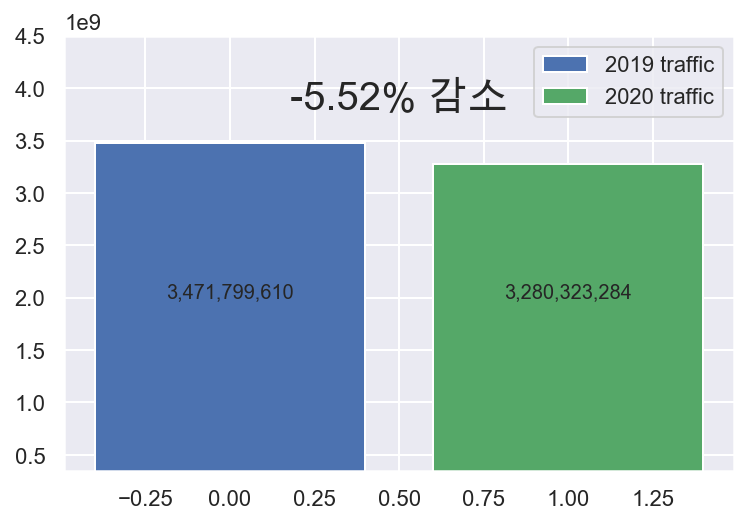

In [364]:
x1 = 0
x2 = 1
df_sum_2019 = pd.DataFrame(traffic_2019, columns=["총합"])
df_sum_2020 = pd.DataFrame(traffic_2020, columns=["총합"])

plt.bar(x1, df_sum_2019.sum(), label="2019 traffic", color='b')
plt.bar(x2, df_sum_2020.sum(), label="2020 traffic", color='g')

plt.legend()
plt.text(0,200*10000000,"3,471,799,610",ha='center')
#plt.text(0.5,400*10000000,"3,280,323,284",ha='center')
plt.text(0.5,380*10000000,"-5.52% 감소",fontsize=20,ha='center')
plt.text(1,200*10000000,"3,280,323,284",ha='center')
plt.ylim([350000000,4500000000])
#plt.xlabel("aaaa")
plt.ylabel(clear)
plt.title("2019-2020 Traffic Counting")

plt.show()

# 2019-2020 월별 통행량 비교

In [255]:
monthly_2019 = df_2019["총합"].groupby([df_2019["month"],df_2019["year"]]).sum().unstack("year")
monthly_2019


year,2019
month,
1,293047880
2,255946482
3,291462852
4,294804467
5,301733907
6,285145303
7,292395939
8,294338097
9,274872597


In [256]:
monthly_2020 = df_2020["총합"].groupby([df_2020["month"],df_2020["year"]]).sum().unstack("year")
monthly_2020

year,2020
month,
1,287338914
2,264851117
3,276988930
4,275890542
5,291438374
6,284005714
7,292195000
8,264936819
9,257213165


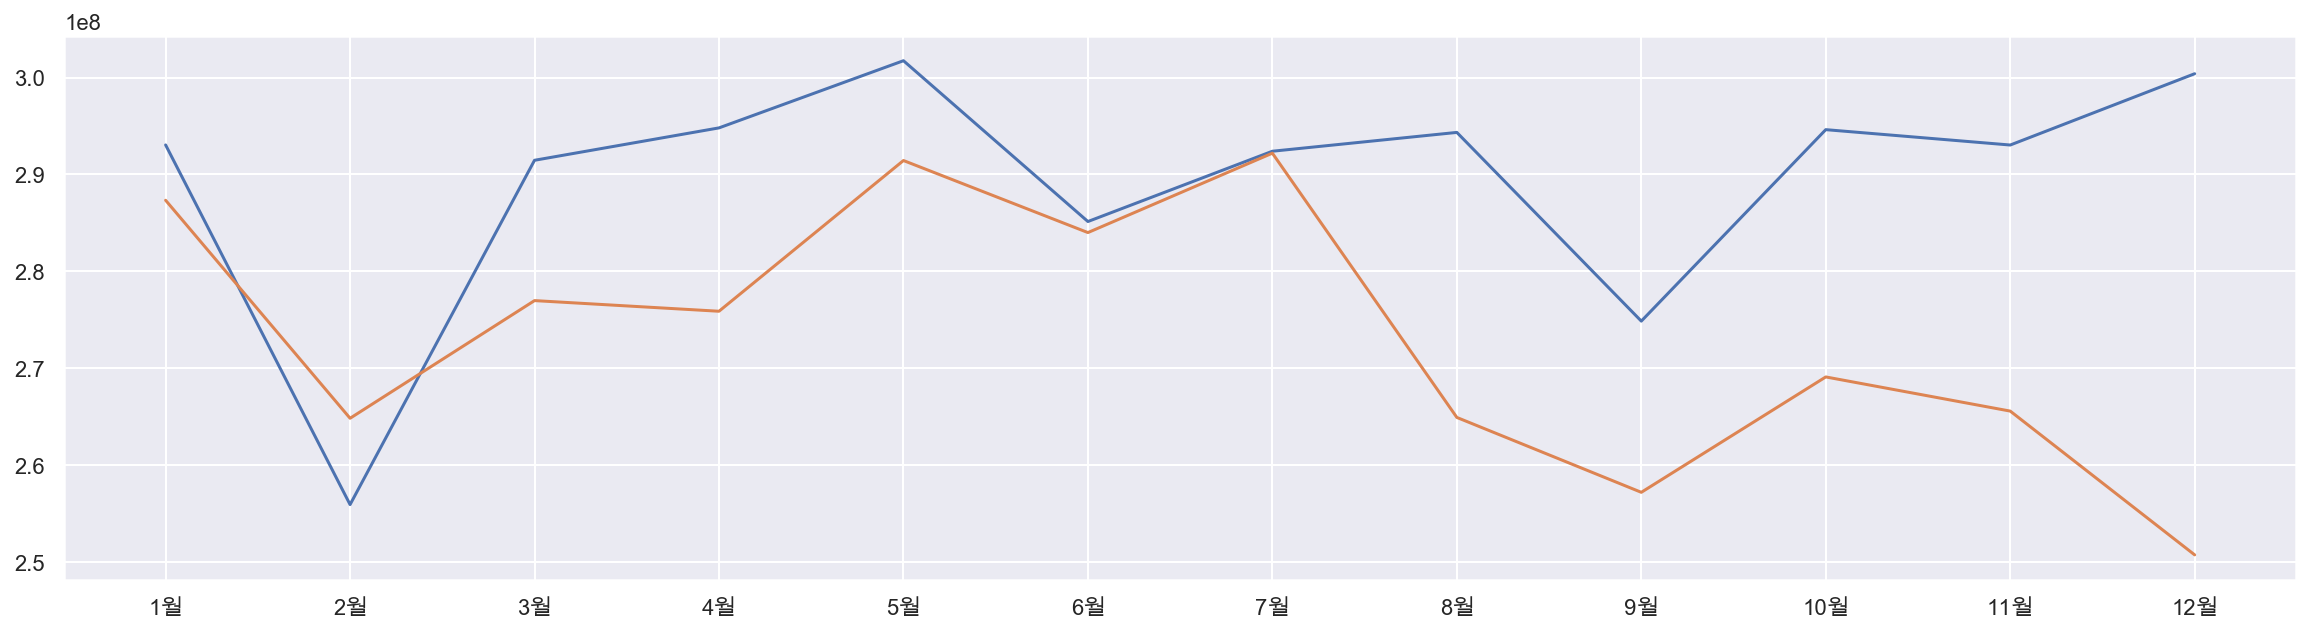

In [334]:
x = ["1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"]
plt.figure(figsize=(20, 5))
plt.plot(x,monthly_2019)
plt.plot(x,monthly_2020)
plt.show()

# 요일별 통행량 비교(주말=토,일)

In [337]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
dayofthweek_2019.loc[["토","일"]]

year,2019
요일,
토,492424776
일,433350226


In [342]:
((830712831-925775002)/925775002) * 100

-10.268388193095756

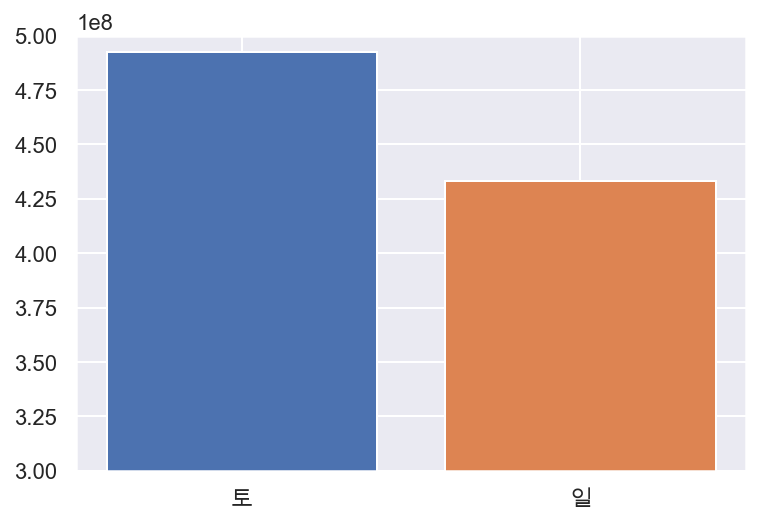

AttributeError: 'Text' object has no property 'fonsize'

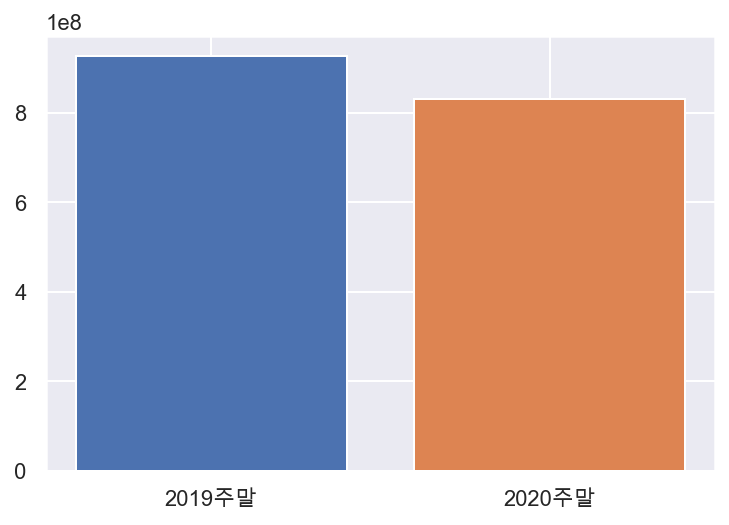

In [361]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
sat_2019 = dayofthweek_2019.loc[["토"]]
sun_2019 = dayofthweek_2019.loc[["일"]]
plt.bar("토", int(sat_2019.values))
plt.bar("일", int(sun_2019.values))
plt.ylim([300000000, 500000000]) 
plt.show()


x
y = [925775002,830712831]
plt.bar("2019주말",925775002)
plt.bar("2020주말",830712831)
plt.text("2020주말",20*10000000000000000000,"-10.28",fonsize=30 ,ha="center")
plt.show()

In [338]:
bb = sat_2019 + sun_2019
print(bb)

year  2019
요일        
일      NaN
토      NaN


In [244]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
sat_2019 = dayofthweek_2019.loc[["토"]]
sun_2019 = dayofthweek_2019.loc[["일"]]
plt.bar("토+일", int(sat_2019.values)+int(sun_2019.values))
#plt.bar("일", int(sun_2019.values))
plt.ylim([300000000, 500000000]) 
plt.show()


KeyError: '요일'

In [227]:
dayofthweek_2020 = df_2020["총합"].groupby([df_2020["요일"],df_2020["year"]]).sum().unstack("year")
dayofthweek_2020.loc[["토","일"]]

year,2020
요일,
토,454937964
일,375774867


In [340]:
454937964+375774867

830712831

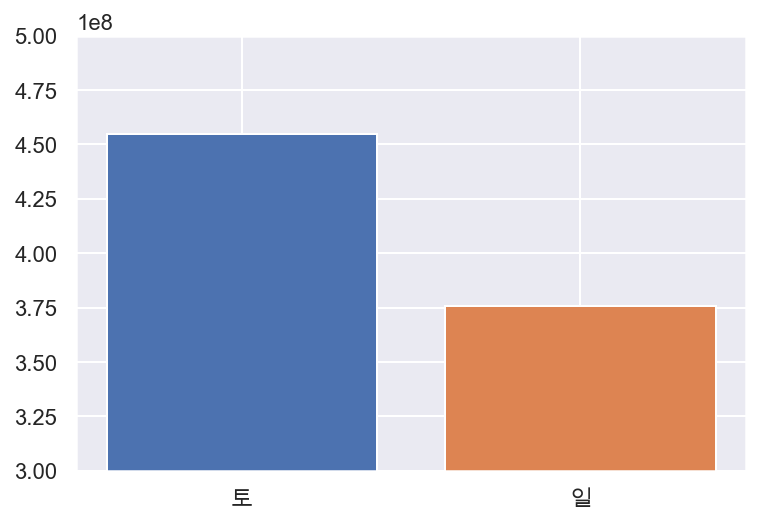

In [228]:
dayofthweek_2020 = df_2020["총합"].groupby([df_2020["요일"],df_2020["year"]]).sum().unstack("year")
sat_2020 = dayofthweek_2020.loc[["토"]]
sun_2020 = dayofthweek_2020.loc[["일"]]
plt.bar("토", int(sat_2020.values))
plt.bar("일", int(sun_2020.values))
plt.ylim([300000000, 500000000]) 
plt.show()

# 요일별 통행량 (평일)

In [229]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
dayofthweek_2019.loc[["월","화","수","목","금"]]

year,2019
요일,
월,495321251
화,509517933
수,527079819
목,492164038
금,521941567


In [333]:
 pd.DataFrame(df_2019, columns=["요일","총합"]).sum()

요일    일수목금토일월화수목금토일월화수목금토일월화수목금토일월화수목금토일월화수수금토일월화수목금...
총합                                           3471799610
dtype: object

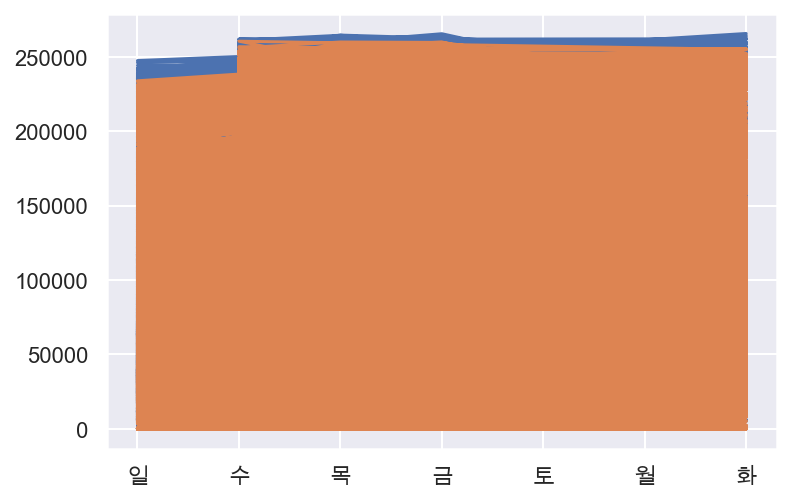

In [332]:
plt.plot(df_2019["요일"], df_2019["총합"])
plt.plot(df_2020["요일"], df_2020["총합"])

In [323]:
type(mon_2019.values)

numpy.ndarray

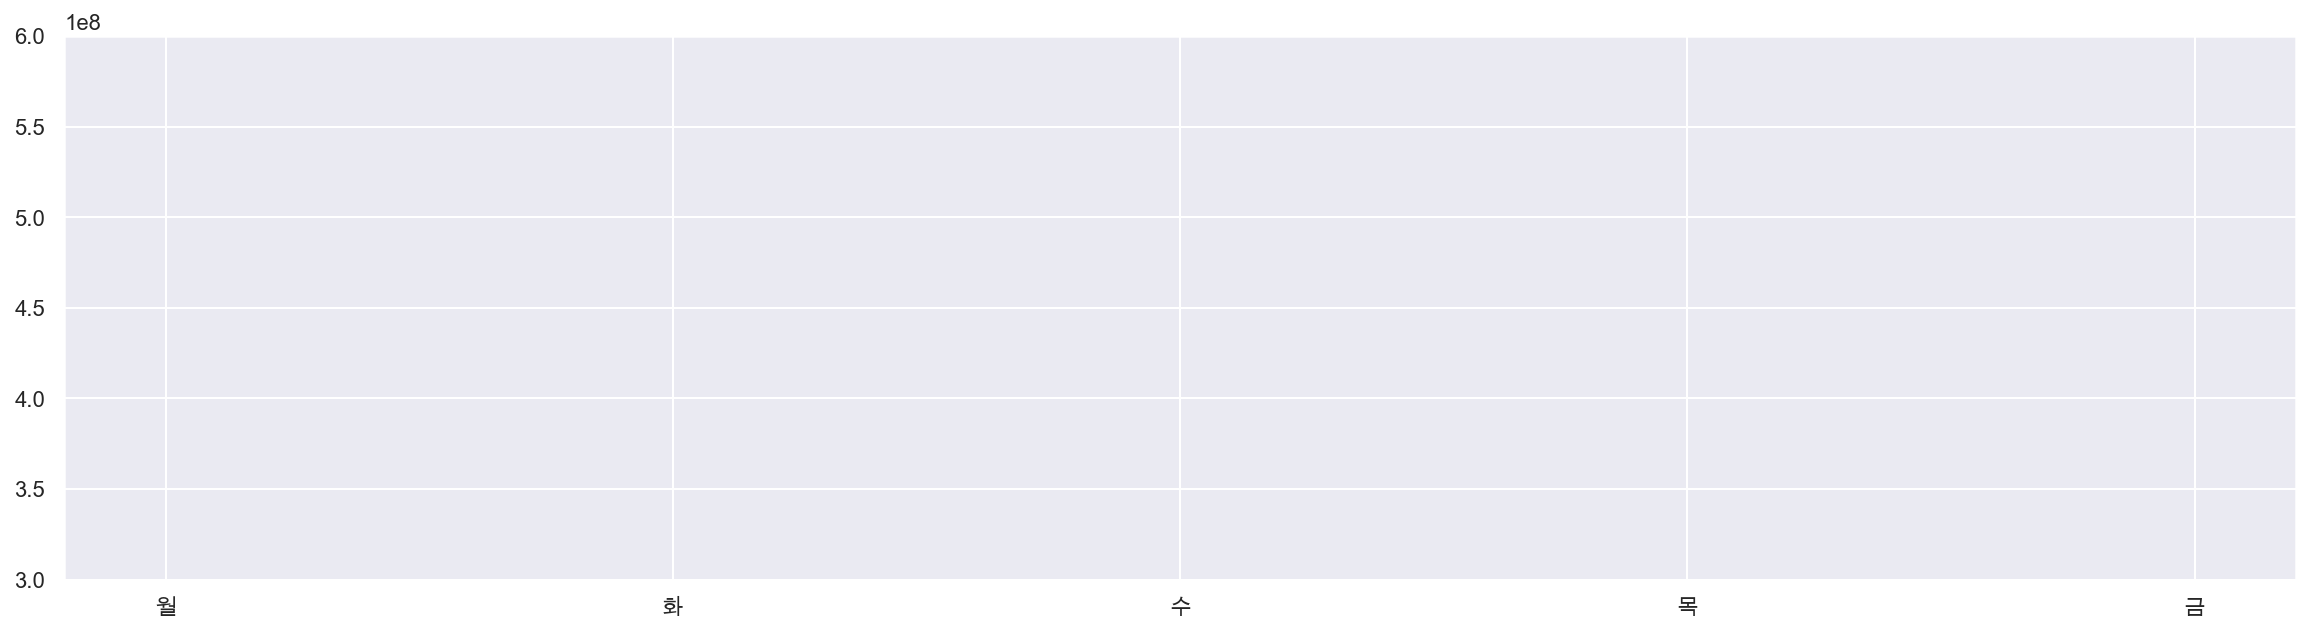

In [314]:
mon_2019 = dayofthweek_2019.loc[["월"]]
tue_2019 = dayofthweek_2019.loc[["화"]]
wed_2019 = dayofthweek_2019.loc[["수"]]
thu_2019 = dayofthweek_2019.loc[["목"]]
fri_2019 = dayofthweek_2019.loc[["금"]]
mon_2020 = dayofthweek_2020.loc[["월"]]
tue_2020 = dayofthweek_2020.loc[["화"]]
wed_2020 = dayofthweek_2020.loc[["수"]]
thu_2020 = dayofthweek_2020.loc[["목"]]
fri_2020 = dayofthweek_2020.loc[["금"]]

plt.figure(figsize=(20, 5))
plt.plot("월", int(mon_2019.values))
plt.plot("화", int(tue_2019.values))
plt.plot("수", int(wed_2019.values))
plt.plot("목", int(thu_2019.values))
plt.plot("금", int(fri_2019.values))

# plt.bar("월", int(mon_2020.values))
# plt.bar("화", int(tue_2020.values))
# plt.bar("수", int(wed_2020.values))
# plt.bar("목", int(thu_2020.values))
# plt.bar("금", int(fri_2020.values))
plt.ylim([300000000, 600000000]) 


plt.show()

In [231]:
dayofthweek_2020 = df_2020["총합"].groupby([df_2020["요일"],df_2020["year"]]).sum().unstack("year")
dayofthweek_2020.loc[["월","화","수","목","금"]]

year,2020
요일,
월,475181608
화,486640237
수,493765368
목,498696678
금,495326562


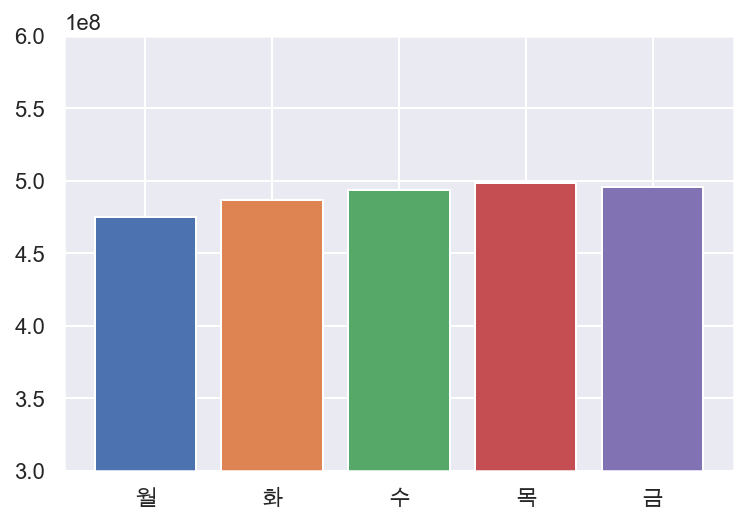

In [232]:
mon_2020 = dayofthweek_2020.loc[["월"]]
tue_2020 = dayofthweek_2020.loc[["화"]]
wed_2020 = dayofthweek_2020.loc[["수"]]
thu_2020 = dayofthweek_2020.loc[["목"]]
fri_2020 = dayofthweek_2020.loc[["금"]]

plt.bar("월", int(mon_2020.values))
plt.bar("화", int(tue_2020.values))
plt.bar("수", int(wed_2020.values))
plt.bar("목", int(thu_2020.values))
plt.bar("금", int(fri_2020.values))

plt.ylim([300000000, 600000000])

plt.show()

# 지역별 통행량 비교

In [233]:
df_2019.groupby(["구","총합"]).sum()

일자    year  month   day  유입  유출     0     1    2    4  \
구    총합                                                                     
 강남구 0      1857556765  185748    754  1365  92   0     0     0    0    0   
     411      20190723    2019      7    23   1   0   411     0    0    0   
     12721    20190105    2019      1     5   1   0   445   331  206  190   
     18544    20190204    2019      2     4   1   0   228   136   99  143   
     18812    20190206    2019      2     6   1   0   355   224  174   88   
...                ...     ...    ...   ...  ..  ..   ...   ...  ...  ...   
중구   80395    20190627    2019      6    27   1   0  1443   936  690  524   
     80565    20190614    2019      6    14   1   0  1456  1028  714  575   
     80673    20190621    2019      6    21   1   0  1588  1108  772  554   
     80842    20191219    2019     12    19   1   0  1457  1005  748  593   
     84611    20191206    2019     12     6   1   0  1543  1129  746  580   

            ...  유입 19시  유출 19시  유입 20시  유출 20시  유입 21시  유출 21시  유입 22시  \
구    총합     ...                                                           
 강남구 0      ...       0       0       0       0       0       0       0   
     411    ...       0       0       0       0       0       0       0   
     12721  ...       0       0       0       0       0       0       0   
     18544  ...     406     392     349     407     298     311     237   
     18812  ...     554     471     518     469     382     377     286   
...         ...     ...     ...     ...     ...     ...     ...     ...   
중구   80395  ...    1726    2305    1578    1563    1692    1551    1514   
     80565  ...    1701    2216    1516    1855    1716    1585    1346   
     80673  ...    1764    2345    1666    1763    1716    1565    1539   
     80842  ...    1793    2356    1684    1749    1700    1652    1505   
     84611  ...    1816    2248    1599    1786    1686    1574    1509   

            유출 22시  유입 23시  유출 23시  
구    총합                             
 강남구 0           0       0       0  
     411         0       0       0  
     12721       0       0       0  
     18544     239     139     134  
     18812     247     178     193  
...            ...     ...     ...  
중구   80395    1353    1140     980  
     80565    1437    1166    1166  
     80673    1488    1287    1194  
     80842    1290    1166     872  
     84611    1459    1260    1158  

[46973 rows x 78 columns]

In [234]:
df_2019 = traffic_2019
df_2019 = df_2019.pivot_table("총합","구",aggfunc=np.sum)
df_2019 = df_2019.reset_index()
df_2019.tail(2)

,구,총합
30,영등포구,258662532
31,중구,164525130


In [235]:
df_2020 = traffic_2020
df_2020 = df_2020.pivot_table("총합","구",aggfunc=np.sum)
df_2020 = df_2020.reset_index()
df_2020.tail(2)

,구,총합
30,영등포구,226580316
31,중구,137745441


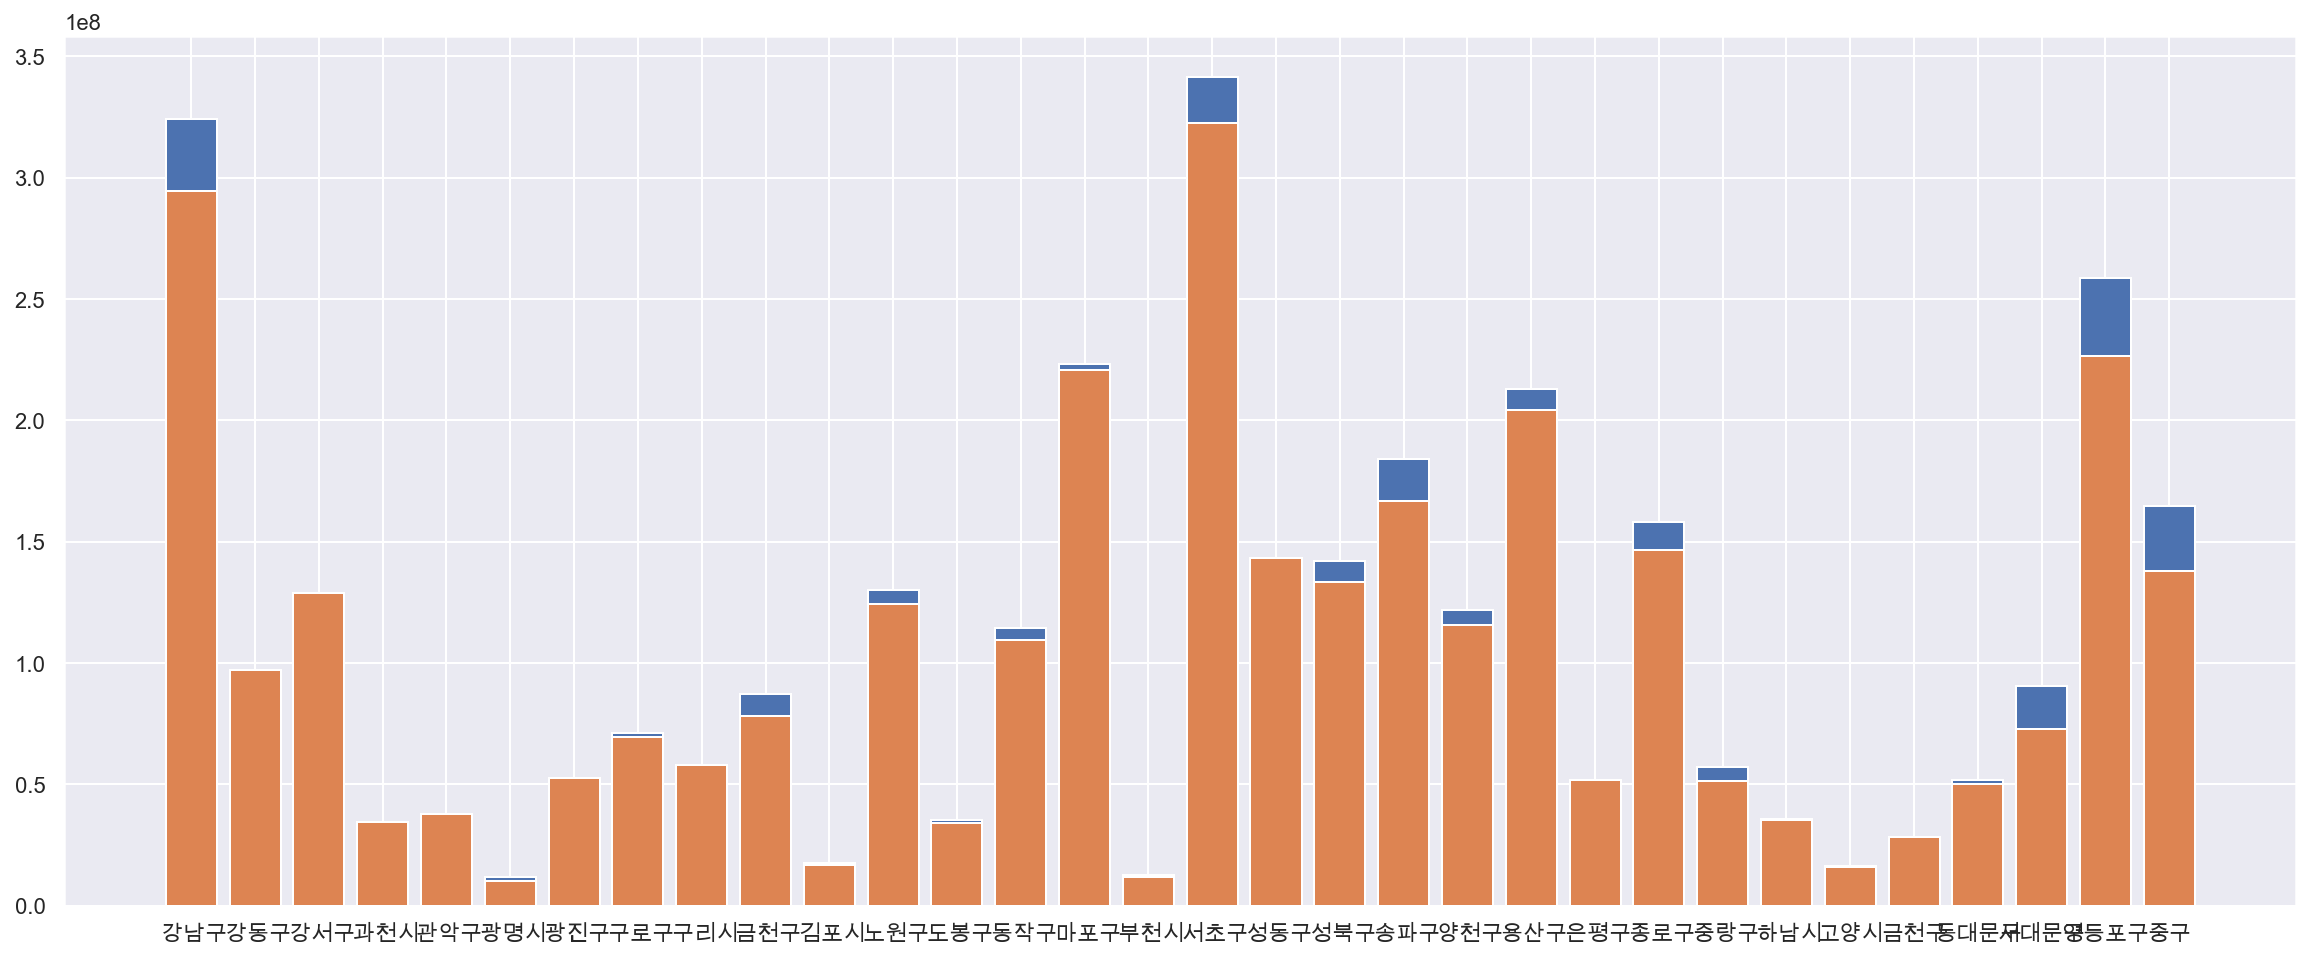

In [242]:
plt.figure(figsize=(20, 8))
plt.bar(df_2019["구"], df_2019["총합"])
plt.bar(df_2020["구"], df_2020["총합"])
plt.show()

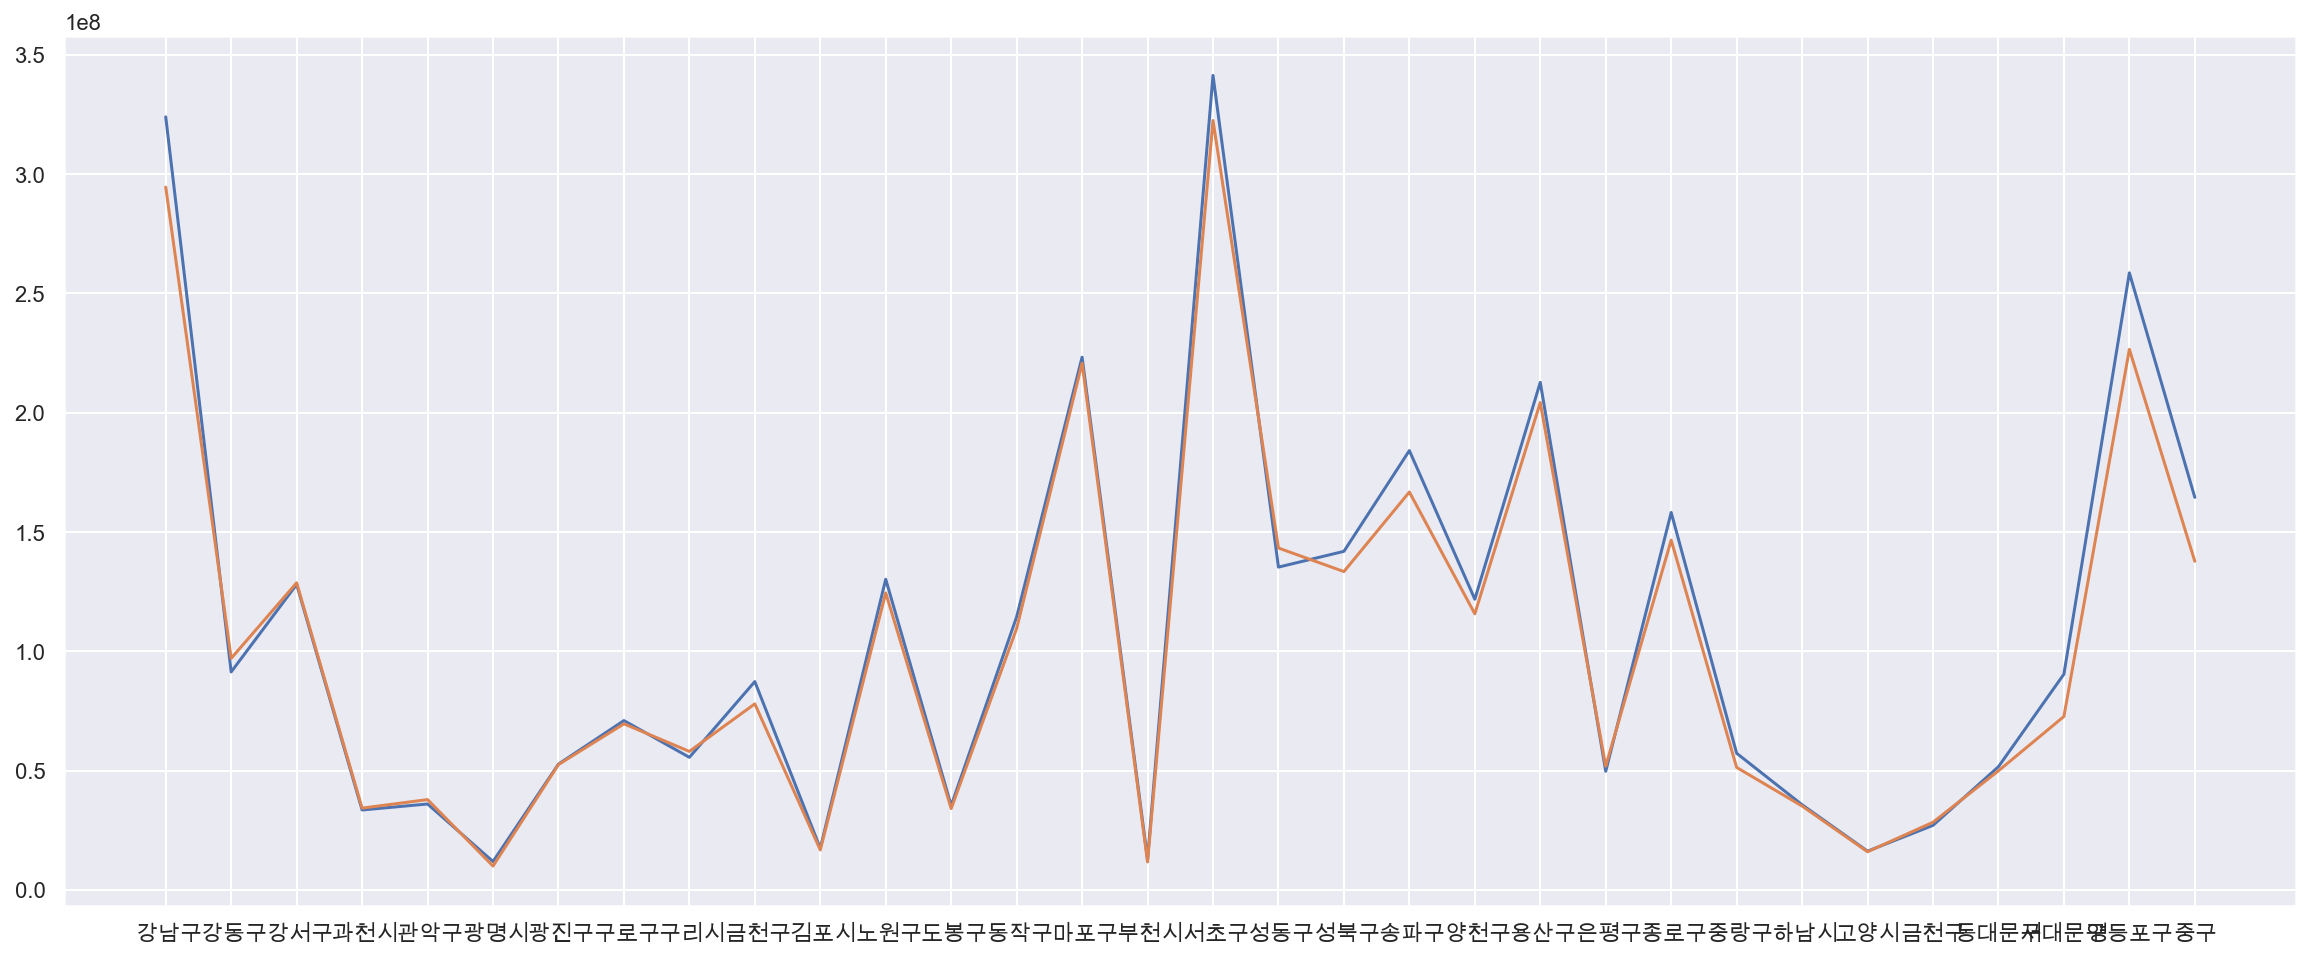

In [243]:
plt.figure(figsize=(20, 8))
plt.plot(df_2019["구"], df_2019["총합"])
plt.plot(df_2020["구"], df_2020["총합"])
plt.show()

In [237]:
dayofthweek_2019 = df_2019["총합"].groupby([df_2019["요일"],df_2019["year"]]).sum().unstack("year")
dayofthweek_2019.loc[]

SyntaxError: invalid syntax (<ipython-input-237-6d890dbe50f2>, line 2)

In [109]:
df_2020 = traffic_2020
df_2020.pivot_table("총합","요일","구",aggfunc=np.sum)

구,강남구,강동구,강서구,과천시,관악구,광명시,광진구,구로구,구리시,금천구,...,은평구,종로구,중랑구,하남시,고양시,금천구,동대문구,서대문구,영등포구,중구
요일,,,,,,,,,,,,,,,,,,,,,
금,44621559,15069375,19713972,5051157,5706105,1552892,8055781,10554606,8954685,12019106,...,7864795,22417232,7660903,5413119,2369722,4449859,7239668,11089346,34440480,21709305
목,45107314,14614140,19487492,5200669,5688605,1551823,8159467,10582575,8868321,12120522,...,7746200,22563920,7767270,5393444,2403667,4377089,7228210,11065801,35135876,21791661
수,44653803,14155599,19157228,5225570,5625049,1534045,8005018,10462434,8728344,12001947,...,7655975,22403749,7671622,5353814,2309830,4218902,7270597,11010418,34805041,21686383
월,42965594,13915394,18930255,4989791,5432640,1451431,7602667,10194094,8211899,11594313,...,7230635,21482828,7442737,5213155,2224459,4149803,6890841,10391158,33281440,20805495
일,33097163,11629133,14418128,3873366,4427446,1048020,5501930,7712160,6686731,8046940,...,6292064,15761502,6131851,3707861,2047928,2939924,6649092,8246957,24196664,13097404
토,40119800,13811933,17908868,4612170,5374149,1362357,7259733,9727887,8250699,10340937,...,7658275,19755020,7236754,4796939,2293688,3948394,7539973,10034496,30285667,17064856
화,44026889,13863748,19117481,5322047,5595306,1487815,7945528,10378316,8347891,11850925,...,7410278,22227012,7420694,5265983,2338760,4272198,7101298,10849328,34435148,21590337


In [133]:
a = traffic_2019.groupby(traffic_2019["구"])["총합"].sum()
print(a)

구
 강남구    324045199
 강동구     91376650
 강서구    128036025
 과천시     33500225
 관악구     36007662
 광명시     11892825
 광진구     52724751
 구로구     70969362
 구리시     55575029
 금천구     87320021
 김포시     17454490
 노원구    130213251
 도봉구     35324996
 동작구    114474299
 마포구    223305329
 부천시     12792469
 서초구    341425467
 성동구    135300187
 성북구    141905753
 송파구    184148545
 양천구    121845149
 용산구    212742829
 은평구     49712510
 종로구    158205040
 중랑구     57281500
 하남시     35680048
고양시      16229267
금천구      27050329
동대문구     51638629
서대문구     90434112
영등포구    258662532
중구      164525130
Name: 총합, dtype: int64


ValueError: shape mismatch: objects cannot be broadcast to a single shape

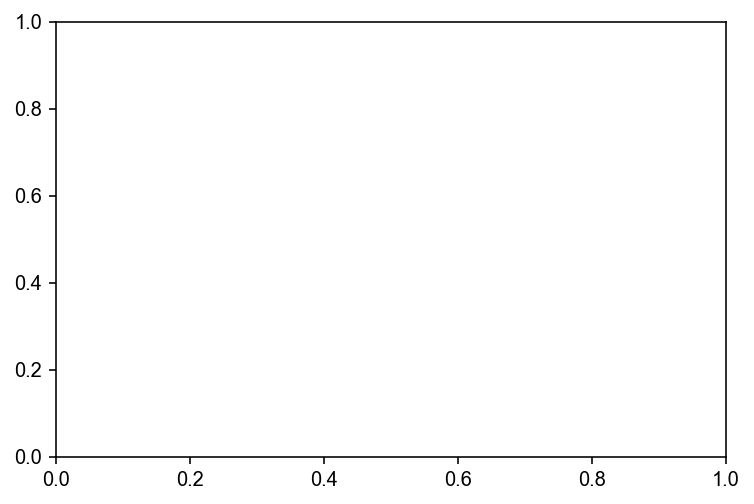

In [136]:
plt.bar(x,a)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(traffic_r_2019["region"], traffic_r_2019["total"])
plt.bar(traffic_r_2020["region"], traffic_r_2020["total"])
plt.show()

In [198]:
traffic_2019.pivot_table[[['구'],['year','month','day','요일','구','총합','0','1','2','3','4','5','6','7','8','9','10','11','12','13',
              '14','15','16','17','18','19','20','21','22','23']]

SyntaxError: unexpected EOF while parsing (<ipython-input-198-b5ad0497bb1a>, line 2)

In [202]:
#df_2020 = traffic_2020
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
df_2020.pivot_table("총합","요일","구",aggfunc=np.sum)
#plt.ylabel()

구,강남구,강동구,강서구,과천시,관악구,광명시,광진구,구로구,구리시,금천구,...,은평구,종로구,중랑구,하남시,고양시,금천구,동대문구,서대문구,영등포구,중구
요일,,,,,,,,,,,,,,,,,,,,,
금,44621559,15069375,19713972,5051157,5706105,1552892,8055781,10554606,8954685,12019106,...,7864795,22417232,7660903,5413119,2369722,4449859,7239668,11089346,34440480,21709305
목,45107314,14614140,19487492,5200669,5688605,1551823,8159467,10582575,8868321,12120522,...,7746200,22563920,7767270,5393444,2403667,4377089,7228210,11065801,35135876,21791661
수,44653803,14155599,19157228,5225570,5625049,1534045,8005018,10462434,8728344,12001947,...,7655975,22403749,7671622,5353814,2309830,4218902,7270597,11010418,34805041,21686383
월,42965594,13915394,18930255,4989791,5432640,1451431,7602667,10194094,8211899,11594313,...,7230635,21482828,7442737,5213155,2224459,4149803,6890841,10391158,33281440,20805495
일,33097163,11629133,14418128,3873366,4427446,1048020,5501930,7712160,6686731,8046940,...,6292064,15761502,6131851,3707861,2047928,2939924,6649092,8246957,24196664,13097404
토,40119800,13811933,17908868,4612170,5374149,1362357,7259733,9727887,8250699,10340937,...,7658275,19755020,7236754,4796939,2293688,3948394,7539973,10034496,30285667,17064856
화,44026889,13863748,19117481,5322047,5595306,1487815,7945528,10378316,8347891,11850925,...,7410278,22227012,7420694,5265983,2338760,4272198,7101298,10849328,34435148,21590337
